# Klasterizacija metodom K-srednjih vrednosti

In [45]:
from testbench import Testbench
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [46]:
Testbench.author('Petar Petrović')

⚠️ Greška pri kontaktiranju servera za praćenje napretka.


Naredna ćelija predstavlja mesto implementacije funkcije predviđanja klastera zadatih podataka. Kao parametar se funkciji prosleđuju podaci u formatu np.ndarray koji je dvodimenzionalan tako da se u redovima nalaze različite instance a u kolonama su date karakteristike pojedinačnih instanci u obliku brojeva. Neophodno je izvršiti podelu na četiri grupacije tako da je povratna vrednost funkcije u formatu np.ndarray i predstavlja numeričku vrednost koja opisuje kom klasteru zadata instanca odgovara. Ukupan broj redova u nizu je 400.

Bitno je da klasteri budu opisani brojevima od 0 do 3 i da je redosled predviđenih klastera za zadate podatke dat u istom redosledu u kom su dati podaci na ulazu. Korišćenje pomoćnih funkcija je dozvoljeno.

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

def k_means(data: np.ndarray) -> np.ndarray:
    number_of_clusters = 4
    preprocessor = Pipeline(
        [
            ("scaler", MinMaxScaler()),
        ]
    )
    clusterer = Pipeline(
        [
            (
                "kmeans",
                KMeans(
                    n_clusters=number_of_clusters,
                    init="k-means++",
                    n_init=50,
                    max_iter=1000,
                    random_state=42,
                ),
            ),
        ]
    )
    pipe = Pipeline(
        [
            ("preprocessor", preprocessor),
            ("clusterer", clusterer)
        ]
    )
    pipe.fit(data)
    predicted_labels = pipe["clusterer"]["kmeans"].labels_

    return predicted_labels

In [48]:
Testbench(k_means)

⚠️ Funkcija 'k_means' uspešno prolazi 98% testova.
⚠️ Greška pri kontaktiranju servera za praćenje napretka.


U narednom segmentu je implementirano generisanje podataka nad kojim se vrši klasterizacija. Datim podacima imate pristup radi eventualnog testiranja koda i modifikacije istog pre pozivanja funkcije Testbench(k_means). 

In [67]:
def generate_point(mean_x, mean_y, deviation_x, deviation_y):
    return random.gauss(mean_x, deviation_x), random.gauss(mean_y, deviation_y)

In [68]:
cluster_mean_x = 50
cluster_mean_y = 50
cluster_deviation_x = 20
cluster_deviation_y = 20
point_deviation_x = 5
point_deviation_y = 5

number_of_clusters = 4
points_per_cluster = 50

#cluster_centers predstavlja centre oko kojih će se nasumično (sa zadatom devijacijom) generisati po stotinu tačaka
#pozivanjem funkcije generate_point
#tačke oformljene oko centara klastera se beleže u nizu points
cluster_centers = np.array([generate_point(cluster_mean_x,
                                           cluster_mean_y,
                                           cluster_deviation_x,
                                           cluster_deviation_y)
                            for _ in range(number_of_clusters)])

points = np.array([generate_point(center_x,
                                  center_y,
                                  point_deviation_x,
                                  point_deviation_y)
                   for center_x, center_y in cluster_centers
                   for _ in range(points_per_cluster)])

classes = np.linspace(0, number_of_clusters - 1, number_of_clusters, dtype=int)
labels = np.repeat(classes, points_per_cluster)

idx = np.random.permutation(len(points))
data = points[idx]
true_labels = labels[idx]

Data ćelija služi za pozivanje funkcije k_means nad prethodno generisanim podacima kao i za izračunavanje tačnosti same predikcije korišćenjem funkcije adjusted_rand_score nad promenljivama true_labels i predicted_cluster.

In [69]:
predicted_cluster = k_means(data)
adjusted_rand_score(true_labels, predicted_cluster)

0.9480306092747299

### Vizuelizacija podataka i rezultata klasterizacije

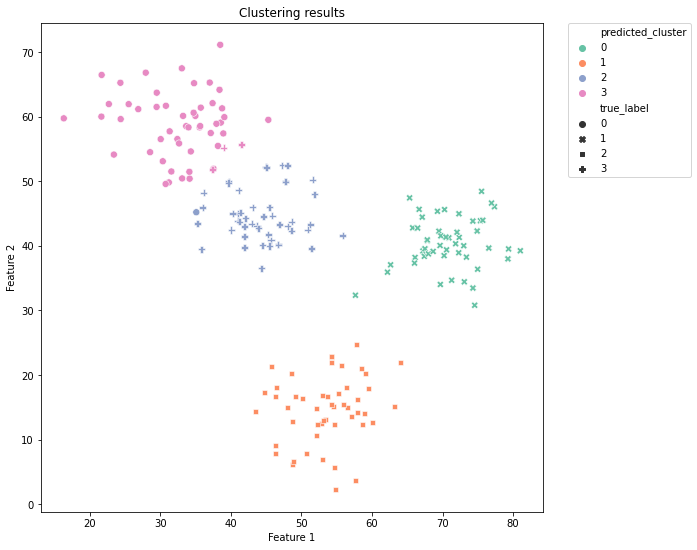

In [72]:
pcadf = pd.DataFrame(data, columns=["component_1", "component_2"])
pcadf["predicted_cluster"] = predicted_cluster
pcadf["true_label"] = true_labels
plt.figure(figsize=(9, 9))

scat = sns.scatterplot(
    x="component_1",
    y="component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
    legend="auto"
)
scat.set_title("Clustering results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [ ]:
for i in classes:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k)
plt.legend()
plt.show()